In [20]:
import pandas as pd

# Load your fraud dataset

fraud_data = pd.read_csv('C:/Users/1234/Downloads/Fraud_check.csv')

# Display the first few rows of the dataset to understand its structure
print(fraud_data.head())

  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [21]:
# Check for missing values
print(fraud_data.isnull().sum())

# Drop duplicates if any
fraud_data = fraud_data.drop_duplicates()

# Handle missing values if necessary (impute or drop)
# For example:
# fraud_data = fraud_data.dropna()

# Check the updated dataset
print(fraud_data.head())

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64
  Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO  


In [22]:
# Treat Taxable_Income <= 30000 as "Risky" and others as "Good"
fraud_data['Taxable_Income_Category'] = pd.cut(fraud_data['Taxable.Income'],
                                               bins=[-float('inf'), 30000, float('inf')],
                                               labels=['Risky', 'Good'])
# Encode categorical variables using one-hot encoding
fraud_data_encoded = pd.get_dummies(fraud_data, columns=['Undergrad','Marital.Status','Urban'])

# Check the updated dataset
print(fraud_data_encoded.head())

   Taxable.Income  City.Population  Work.Experience Taxable_Income_Category  \
0           68833            50047               10                    Good   
1           33700           134075               18                    Good   
2           36925           160205               30                    Good   
3           50190           193264               15                    Good   
4           81002            27533               28                    Good   

   Undergrad_NO  Undergrad_YES  Marital.Status_Divorced  \
0          True          False                    False   
1         False           True                     True   
2          True          False                    False   
3         False           True                    False   
4          True          False                    False   

   Marital.Status_Married  Marital.Status_Single  Urban_NO  Urban_YES  
0                   False                   True     False       True  
1                   False 

In [23]:
# Step 1: Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

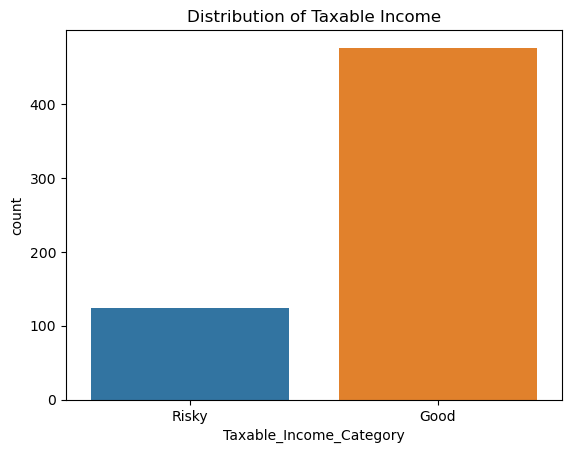

In [24]:
# Step 2: Visualize the distribution of the target variable (Risky/Good)
sns.countplot(x='Taxable_Income_Category', data=fraud_data)
plt.title('Distribution of Taxable Income')
plt.show()

In [31]:
# The plot shows a significant difference in the counts between the "Risky" and "Good" categories. The majority of cases are labeled as "Good," it indicates that most individuals have taxable income above 30000.

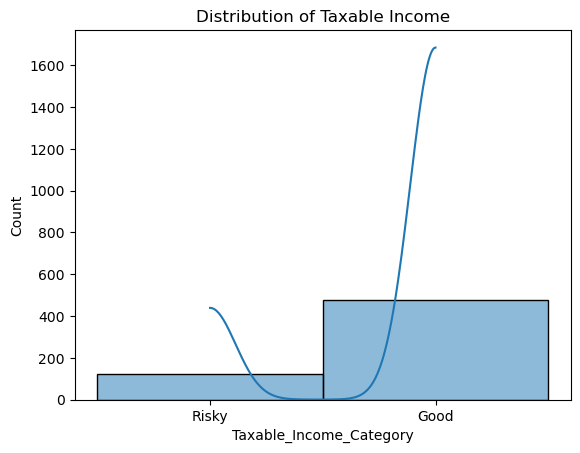

In [32]:
# Step 3: Visualize the distribution of taxable_income
sns.histplot(fraud_data['Taxable_Income_Category'], bins=30, kde=True)
plt.title('Distribution of Taxable Income')
plt.show()

In [33]:
#Shape of the Distribution: The histogram shows the distribution of taxable income. You can observe the data is skewed to the right. A skewed distribution indicates income disparities of specific income groups.

In [47]:
# Step 4: Create a new column for risk classification
fraud_data['risk'] = fraud_data['Taxable_Income_Category'].apply(lambda x: 'Risky' if x = <'30000' else 'Good')

SyntaxError: expected 'else' after 'if' expression (2849882535.py, line 2)

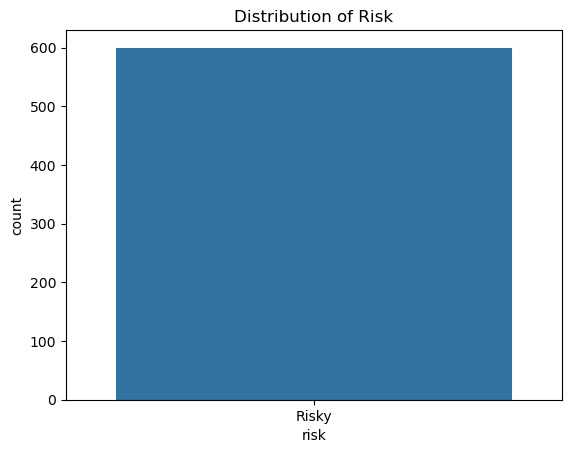

In [48]:
# Step 5: Visualize the distribution of the risk variable
sns.countplot(x='risk', data=fraud_data)
plt.title('Distribution of Risk')
plt.show()

In [36]:
# The inference from the distribution of the risk variable suggests that there is an imbalance, with a higher count of individuals labeled as "Good" compared to "Risky," indicating that a majority of individuals have taxable incomes above 30000, potentially leading to a lower occurrence of risky classifications.

C:\Users\1234\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


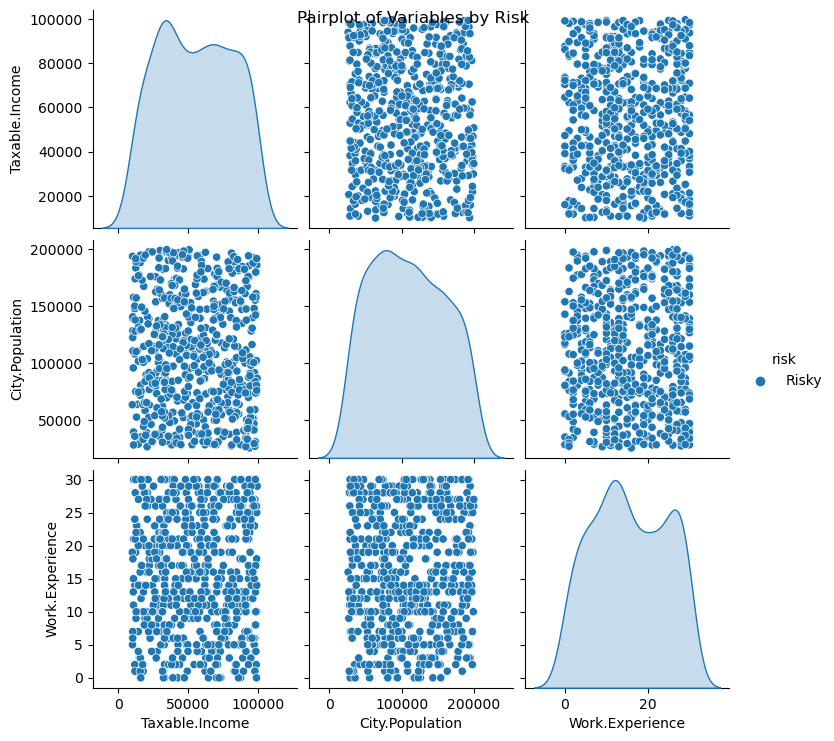

In [37]:
# Step 6: Explore relationships between variables
sns.pairplot(fraud_data, hue='risk')
plt.suptitle('Pairplot of Variables by Risk')
plt.show()

In [38]:
# The pairplot visualization suggests that individuals with lower taxable income and shorter work experience are more likely to be classified as "Risky," indicating a potential correlation between these variables and the risk classification.

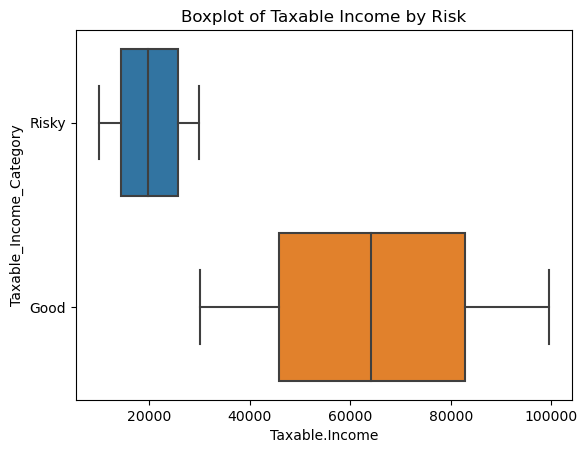

In [39]:
# Step 7: Boxplot for numerical variables by risk
sns.boxplot(x='Taxable.Income', y='Taxable_Income_Category', data=fraud_data)
plt.title('Boxplot of Taxable Income by Risk')
plt.show()

In [40]:
# The boxplot of taxable income by risk category suggests that individuals in the "Risky" category (taxable_income <= 30000) tend to have lower taxable incomes compared to those in the "Good" category, potentially indicating financial vulnerability as a reason for the higher risk classification.